<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data in FBProphet

_By Steven Longstreet (Washington DC) and Bryce Peake (Washington DC)_

### Learning Objectives
 
**After this lesson, you will be able to:**
- Identify time series data.
- Explain the challenges of working with time series data.
- Use the `datetime` library to represent dates as objects.
- Preprocess time series data with Pandas
- Create and visualize a Time Series model using FBProphet
- Evaluate a Time Series model

<h2><a id="A">What is a Time Series?</a></h2>
A **time series** is a series of data points that's indexed (or listed, or graphed) in time order. Most commonly, a time series is a sequence that's taken at successive equally spaced points in time. Time series are often represented as a set of observations that have a time-bound relation, which is represented as an index.

Time series are commonly found in sales, analysis, stock market trends, economic phenomena, and social science problems.

These data sets are often investigated to evaluate the long-term trends, forecast the future, or perform some other form of analysis.

### Let's take a look at some Apple stock data to get a feel for what time series data look like.

In [1]:
import pandas as pd
from datetime import timedelta
%matplotlib inline

apple_stock = pd.read_csv("./data/aapl.csv")
apple_stock.head()

,Date,Open,High,Low,Close,Volume
0,13-Jan-17,119.11,119.62,118.81,119.04,26111948
1,12-Jan-17,118.90,119.30,118.21,119.25,27086220
2,11-Jan-17,118.74,119.93,118.60,119.75,27588593
3,10-Jan-17,118.77,119.38,118.30,119.11,24462051
4,9-Jan-17,117.95,119.43,117.94,118.99,33561948


<h2><a id="B">The DateTime library</a></h2>
As time is important to time series data, we will need to interpret these data in the ways that humans interpret them (which is many ways). 

Python's `DateTime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own `datetime` series and objects.

In this lesson, we'll review these data types and learn a little more about each of them:

* `datetime` objects.
* `datetime` series.
* Timestamps.
* `timedelta()`.

### `datetime` Objects
Below, we'll load in the `DateTime` library, which we can use to create a `datetime` object by entering in the different components of the date as arguments.

In [2]:
# The datetime library is something you should already have from Anaconda.
from datetime import datetime

In [3]:
# Let's just set a random datetime — not the end of the world or anything.
lesson_date = datetime(2012, 12, 21, 12, 21, 12, 844089)

In [14]:
type(lesson_date)

datetime.datetime

In [4]:
#The components of the date are accessible via the object's attributes.
print("Micro-Second", lesson_date.microsecond)
print("Second", lesson_date.second)
print("Minute", lesson_date.minute)
print("Hour", lesson_date.hour)
print("Day", lesson_date.day)
print("Month",lesson_date.month)
print("Year", lesson_date.year)

Micro-Second 844089
Second 12
Minute 21
Hour 12
Day 21
Month 12
Year 2012


### `timedelta()`
Suppose we want to add time to or subtract time from a date. Maybe we're using time as an index and want to get everything that happened a week before a specific observation.

We can use a `timedelta` object to shift a `datetime` object. Here's an example:

In [5]:
# Import timedelta() from the DateTime library.
from datetime import timedelta

# Timedeltas represent time as an amount rather than as a fixed position.
offset = timedelta(days=1, seconds=20)

# The timedelta() has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


`datetime`'s `.now()` function will give you the `datetime` object of this very moment.

In [6]:
now = datetime.now()
print("Like Right Now: ", now)

Like Right Now:  2021-03-16 13:26:22.984281


The current time is particularly useful when using `timedelta()`.

In [7]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2021-03-17 13:26:42.984281
Past:  2021-03-15 13:26:02.984281


*Note: The largest value a `timedelta()` can hold is days. For instance, you can't say you want your offset to be two years, 44 days, and 12 hours; you have to convert those years to days.*

You can read more about the `timedelta()` category [here](https://docs.python.org/2/library/datetime.html).

## Preprocessing Time Series Data with Pandas

In [8]:
#Overwrite the original `Date` column with one that's been converted to a `datetime` series.
apple_stock['Date'] = pd.to_datetime(apple_stock.Date)
apple_stock.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### The `.dt` Attribute
Pandas' `datetime` columns have a `.dt` attribute that allows you to access attributes that are specific to dates. For example:

    aapl.Date.dt.day
    aapl.Date.dt.month
    aapl.Date.dt.year
    aapl.Date.dt.weekday_name

Check out the Pandas `.dt` [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html) for more information.

In [9]:
apple_stock.Date.dt.weekday_name.head()

0       Friday
1     Thursday
2    Wednesday
3      Tuesday
4       Monday
Name: Date, dtype: object

In [10]:
apple_stock.Date.dt.dayofyear.head()

0    13
1    12
2    11
3    10
4     9
Name: Date, dtype: int64

### Timestamps
Timestamps are useful objects for comparisons. You can create a timestamp object using the `pd.to_datetime()` function and a string specifying the date. These objects are especially helpful when you need to perform logical filtering with dates.

In [11]:
ts = pd.to_datetime('1/1/2017')
ts

Timestamp('2017-01-01 00:00:00')


The main difference between a `datetime` object and a timestamp is that timestamps can be used as comparisons.

In [13]:
apple_stock.loc[apple_stock.Date >= ts, :].head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


### Filter by date with Pandas
It is easy to filter by date using Pandas. Let's create a subset of data containing only the stock prices from 2017. We can specify the index as a string constant. 

In [15]:
#first, set the date (as a datetime obj) as the index
apple_stock.set_index('Date', inplace=True)

In [16]:
#we can ask for only that data from December 2016
apple_stock['2016-12']

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-30,116.65,117.20,115.43,115.82,30586265
2016-12-29,116.45,117.11,116.40,116.73,15039519
2016-12-28,117.52,118.02,116.20,116.76,20905892
2016-12-27,116.52,117.80,116.49,117.26,18296855
2016-12-23,115.59,116.52,115.59,116.52,14249484
2016-12-22,116.35,116.51,115.64,116.29,26085854
2016-12-21,116.80,117.40,116.78,117.06,23783165
2016-12-20,116.74,117.50,116.68,116.95,21424965
2016-12-19,115.80,117.38,115.75,116.64,27779423


There are a few things to note about indexing with time series. Unlike numeric indexing, the end index will be included. If you want to index with a range, the time indices must be sorted first.  

> **Recap:** The steps for preprocessing time series data are to:
* Convert time data to a `datetime` object.
* Set `datetime` to index the DataFrame.

## Independent Practice
Let's use the UFO data set to build a timeseries

In [ ]:
# Create a `datetime` object representing today's date.


In [ ]:
# Load the UFO data set from the internet.
import pandas as pd
from datetime import timedelta
%matplotlib inline

ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
# Convert the Time column to a datetime object.


In [ ]:
# Set the `Time` column to the index of the dataframe.


In [ ]:
# Create a `timestamp` object for the date January 1, 1999.


In [ ]:
# Create a subset of entries with a date above or equal to January 1, 1999 using a timestamp object.


## Time Series modeling with FBProphet
You will need to install prophet for this notebook. While we've used `pip install` in the past, it often causes errors. So, in terminal, we'll use an alternative: `conda install -c conda-forge fbprophet`

In [17]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

Importing plotly failed. Interactive plots will not work.


# Read in the data

Read the data in from the retail sales CSV file in the examples folder then set the index to the 'date' column. We are also parsing dates in the data file.

In [21]:
sales_df = pd.read_csv('./data/retail_sales.csv', parse_dates = True, low_memory = False)

In [22]:
sales_df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


# Prepare for Prophet

For prophet to work, we need to change the names of these columns to 'ds' and 'y', so lets just create a new dataframe and keep our old one handy (you'll see why later). The new dataframe will initially be created with an integer index so we can rename the columns

In [23]:
sales_df.rename(columns={'date':'ds', 'sales':'y'}, inplace = True)

In [24]:
sales_df.head()

,ds,y
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


Now's a good time to take a look at your data.  Plot the data using pandas' ```plot``` function

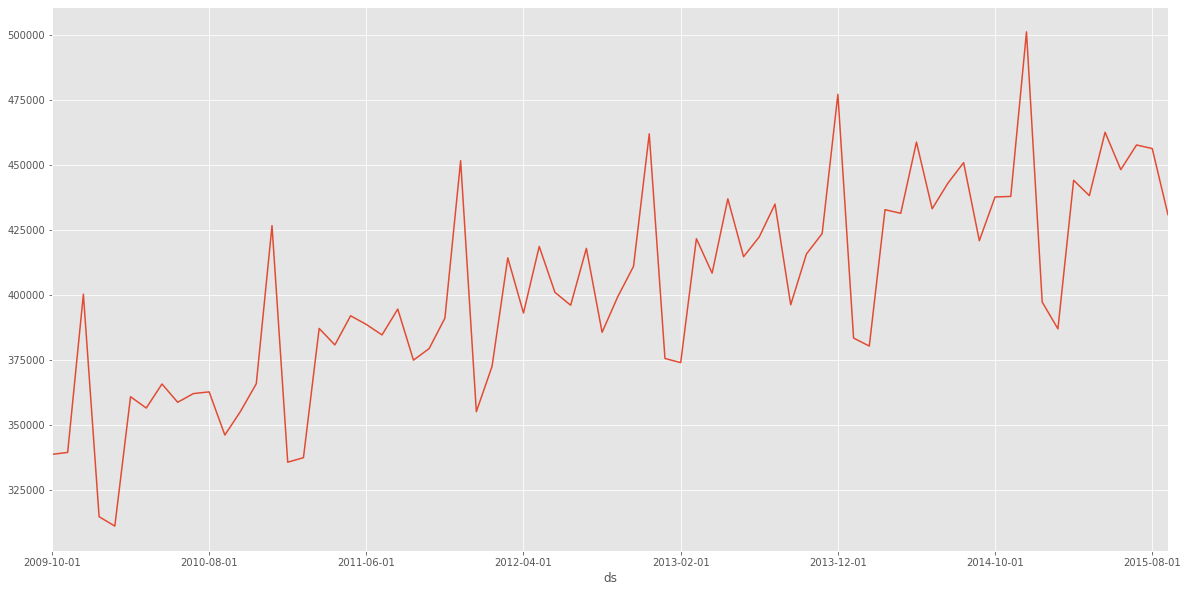

In [25]:
sales_df.set_index('ds').y.plot()

When working with time-series data, its good to take a look at the data to determine if trends exist, whether it is stationary, has any outliers and/or any other anamolies. Facebook prophet's example uses the log-transform as a way to remove some of these anomolies but it isn't the absolute 'best' way to do this...but given that its the example and a simple data series, I'll follow their lead for now.  Taking the log of a number is easily reversible to be able to see your original data. 

To log-transform your data, you can use numpy's log() function

In [26]:
sales_df['y'] = np.log(sales_df['y'])

In [27]:
sales_df.tail()

,ds,y
67,2015-05-01,13.044650
68,2015-06-01,13.013060
69,2015-07-01,13.033991
70,2015-08-01,13.030993
71,2015-09-01,12.973671


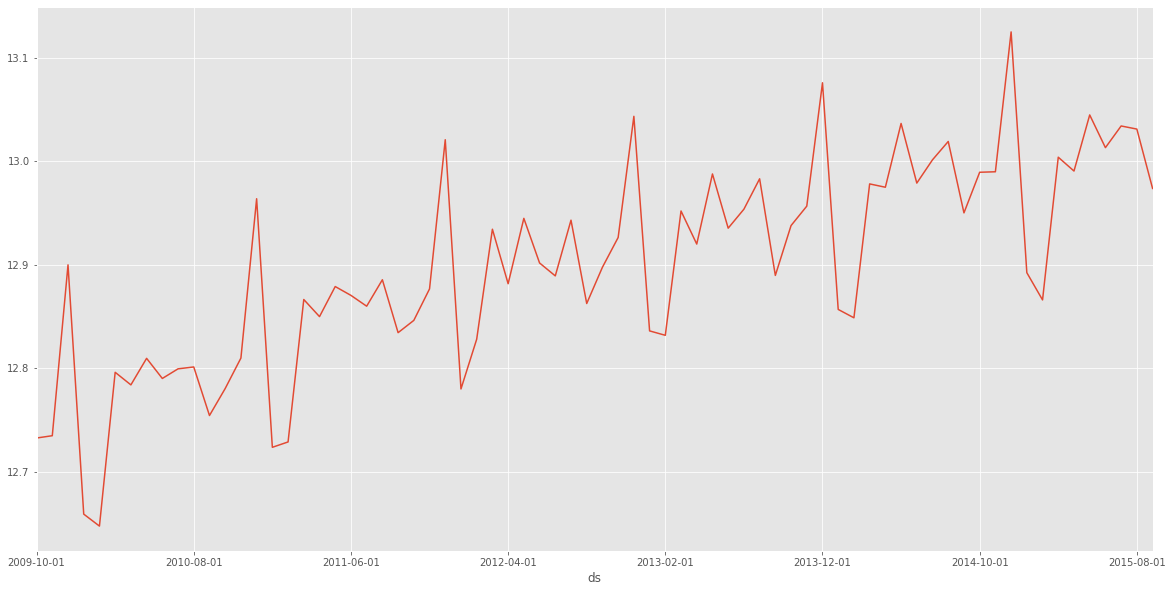

In [28]:
sales_df.set_index('ds').y.plot()

As you can see in the above chart, the plot looks the same as the first one but just at a different scale.

# Running Prophet

Now, let's set prophet up to begin modeling our data.

Note: Since we are using monthly data, you'll see a message from Prophet saying ```Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.```  This is OK since we are workign with monthly data but you can disable it by using ```weekly_seasonality=True``` in the instantiation of Prophet.

In [29]:
model = Prophet()
model.fit(sales_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Forecasting is fairly useless unless you can look into the future, so we need to add some future dates to our dataframe. For this example, I want to forecast 2 years into the future, so I'll built a future dataframe with 24 periods since we are working with monthly data. Note the ```freq='m'``` inclusion to ensure we are adding 24 months of data.

This can be done with the following code:


In [30]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


To forecast this future data, we need to run it through Prophet's model.

In [31]:
forecast = model.predict(future)

The resulting forecast dataframe contains quite a bit of data, but we really only care about a few columns.  First, let's look at the full dataframe:

In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2017-04-30,13.041237,12.867992,13.291291,12.848524,13.270580,0.018364,0.018364,0.018364,0.018364,0.018364,0.018364,0.0,0.0,0.0,13.059601
92,2017-05-31,13.042942,12.854933,13.303714,12.840479,13.287312,0.012932,0.012932,0.012932,0.012932,0.012932,0.012932,0.0,0.0,0.0,13.055874
93,2017-06-30,13.044592,12.853579,13.339636,12.821386,13.303525,0.031733,0.031733,0.031733,0.031733,0.031733,0.031733,0.0,0.0,0.0,13.076325
94,2017-07-31,13.046298,12.815631,13.335981,12.804693,13.324100,0.009755,0.009755,0.009755,0.009755,0.009755,0.009755,0.0,0.0,0.0,13.056053
95,2017-08-31,13.048003,12.770587,13.323015,12.792467,13.343356,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,-0.020633,0.0,0.0,0.0,13.027370


We really only want to look at yhat, yhat_lower and yhat_upper, so we can do that with:

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,13.059601,12.867992,13.291291
92,2017-05-31,13.055874,12.854933,13.303714
93,2017-06-30,13.076325,12.853579,13.339636
94,2017-07-31,13.056053,12.815631,13.335981
95,2017-08-31,13.027370,12.770587,13.323015


# Plotting Prophet results

Prophet has a plotting mechanism called ```plot```.  This plot functionality draws the original data (black dots), the model (blue line) and the error of the forecast (shaded blue area).

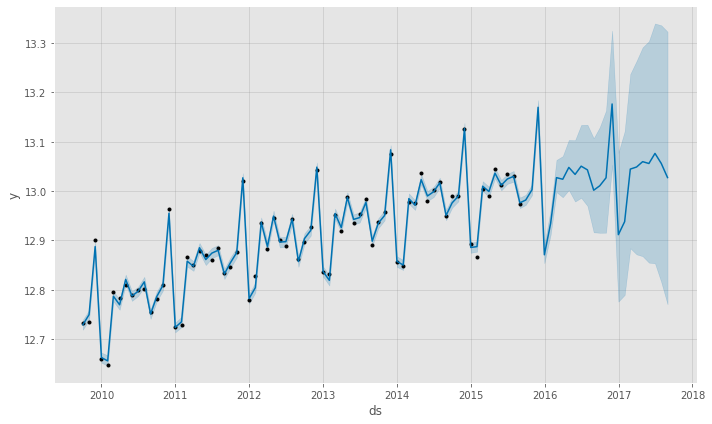

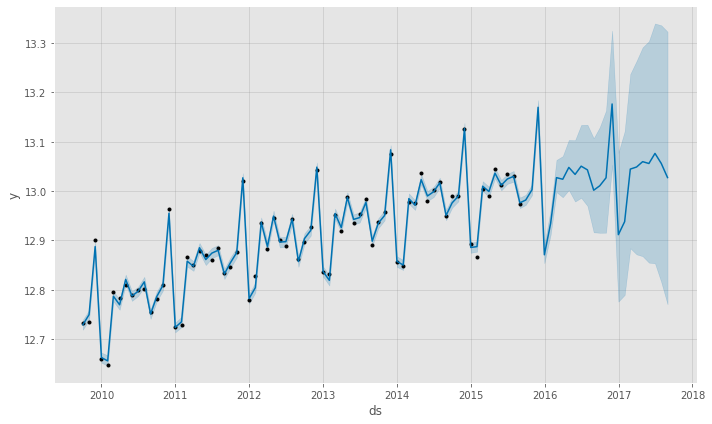

In [34]:
model.plot(forecast)

## Evaluating Prophet
The shaded blue area is the error of the forecast. But we can only eyeball it. Let's look at the R-squared (amount of variance) and Mean Squared Error. 

In [35]:
#To do this, we have to get the y-hat and original y's from the data
metric_df = forecast.set_index('ds')[['yhat']].join(sales_df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
91,2017-04-30,13.059601,NaN
92,2017-05-31,13.055874,NaN
93,2017-06-30,13.076325,NaN
94,2017-07-31,13.056053,NaN
95,2017-08-31,13.027370,NaN


In [36]:
# The tail has NaN values, because they're predictions - there was no real Y. Let's drop those for model evaluation.
metric_df.dropna(inplace = True)

In [37]:
#Let's take a look at the numbers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R-squared: ", r2_score(metric_df.y, metric_df.yhat))
print("Mean Squared Error: ", mean_squared_error(metric_df.y, metric_df.yhat))
print("RMSE: ", np.sqrt(mean_squared_error(metric_df.y, metric_df.yhat)))


R-squared:  0.9937030580846195
Mean Squared Error:  6.305748851936586e-05
RMSE:  0.00794087454373672


An R2 value of .99 is phenomenal... and too good to be true. Our massive MSE confirms any suspcion tha thte model is overfit and won't be very predictive in the future. Part of the problem in this example is that the its monthly, and there aren't enough data points to build a robust model. 

## Accounting for Seasonality and Trends

We can see from this data that there is a spike in the same month each year. While spike could be due to many different reasons, let's assume its because there's a major promotion that this company runs every year at that time, which is in December for this dataset.

When patterns repeat over *known, fixed periods* of time within a data set, we call this **seasonality**. A seasonal pattern exists when a series is influenced by factors related to the cyclic nature of time — i.e., time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality. Additionally, it must be either attributed to another factor or counted as a set of anomalous events in the data.

### Prophet calls them "holidays"

Because we know this promotion occurs every december, we want to use this knowledge to help prophet better forecast those months, so we'll use prohpet's ```holiday``` construct (explained here https://facebookincubator.github.io/prophet/docs/holiday_effects.html).

The holiday object is a pandas dataframe with the holiday and date of the holiday. For this example, the construct would look like this:

```promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})```

This ```promotions``` dataframe consisists of promotion dates for Dec in 2009 through 2015,  The ```lower_window``` and ```upper_window``` values are set to zero to indicate that we don't want prophet to consider any other months than the ones listed.

In [38]:
# Build the promotions dataframe from above here - be sure you understand the syntax and logic!
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [39]:
# Remember, we need to log-transform for prophet
sales_df['y'] = np.log(sales_df['y'])
sales_df.head()

,ds,y
0,2009-10-01,2.544171
1,2009-11-01,2.544346
2,2009-12-01,2.557218
3,2010-01-01,2.538383
4,2010-02-01,2.537469


In [40]:
#Now let's set up prophet to model our data using holidays
model = Prophet(holidays=promotions)
model.fit(sales_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#We've instantiated the model, so now we need to build our future dates to forecast into!
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

#... and then run our future data through prophet's model
forecast = model.predict(future)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,december_promotion,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-10-01,2.659732,2.543090,2.544360,2.659732,2.659732,-0.116002,-0.116002,-0.116002,0.000000,...,0.000000,0.000000,0.000000,-0.116002,-0.116002,-0.116002,0.0,0.0,0.0,2.543729
1,2009-11-01,2.661457,2.544748,2.546008,2.661457,2.661457,-0.116075,-0.116075,-0.116075,0.000000,...,0.000000,0.000000,0.000000,-0.116075,-0.116075,-0.116075,0.0,0.0,0.0,2.545383
2,2009-12-01,2.663127,2.555827,2.557112,2.663127,2.663127,-0.106668,-0.106668,-0.106668,-1.405551,...,-1.405551,-1.405551,-1.405551,1.298883,1.298883,1.298883,0.0,0.0,0.0,2.556459
3,2010-01-01,2.664307,2.538085,2.539314,2.664307,2.664307,-0.125597,-0.125597,-0.125597,0.000000,...,0.000000,0.000000,0.000000,-0.125597,-0.125597,-0.125597,0.0,0.0,0.0,2.538710
4,2010-02-01,2.665487,2.537496,2.538801,2.665487,2.665487,-0.127351,-0.127351,-0.127351,0.000000,...,0.000000,0.000000,0.000000,-0.127351,-0.127351,-0.127351,0.0,0.0,0.0,2.538136


In [43]:
#while our new df contains a bit of data, we only care about a few features...
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2017-04-30,2.571317,2.527799,2.615785
92,2017-05-31,2.570551,2.522393,2.619725
93,2017-06-30,2.571212,2.519564,2.624634
94,2017-07-31,2.568653,2.512460,2.625160
95,2017-08-31,2.565972,2.505023,2.627907


## Visualizing with holidays!
Same as above at first blush!

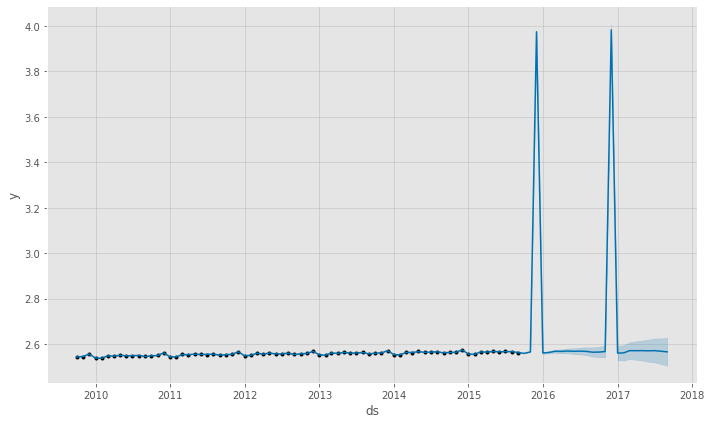

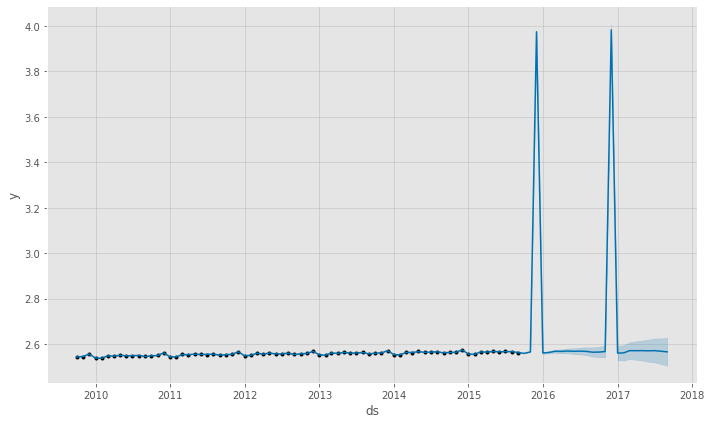

In [48]:
#use Prophet's .plot() method to visualize your timeseries.
model.plot(forecast)

Prophet also allows you to examine the ```components``` of a timeseries using the ```.plot_components()``` method

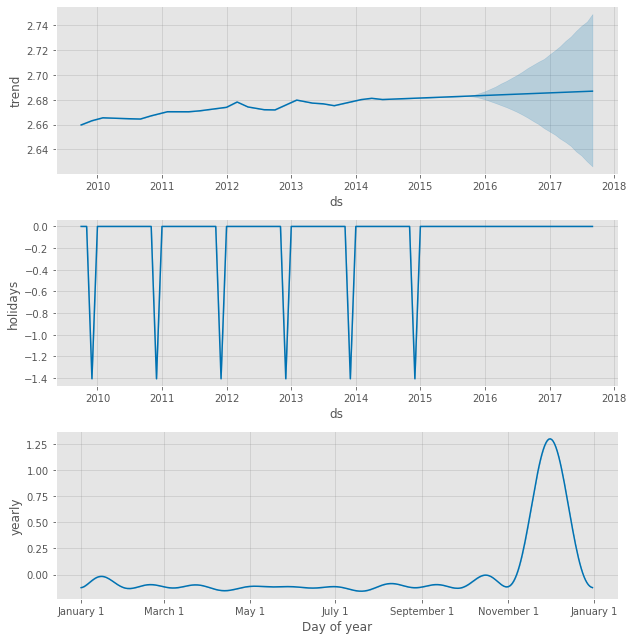

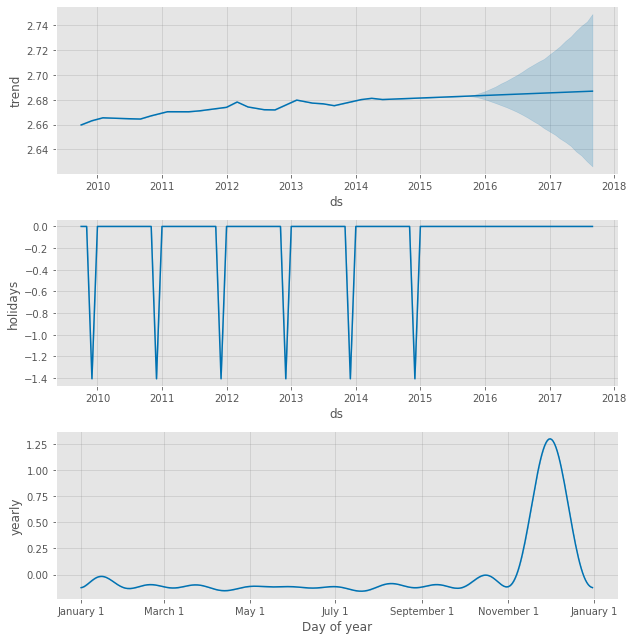

In [47]:
model.plot_components(forecast)


## Why holidays matter
Let's re-run our prophet model without holidays, for comparison

In [49]:
model_no_holiday = Prophet()
model_no_holiday.fit(sales_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future_no_holiday = model_no_holiday.make_future_dataframe(periods=24, freq = 'm')
future_no_holiday.tail()

,ds
91,2017-04-30
92,2017-05-31
93,2017-06-30
94,2017-07-31
95,2017-08-31


In [51]:
forecast_no_holiday = model_no_holiday.predict(future)

There probably won't be a massive difference, given the small amount of data with which we're working on this example. But with greater data comes greater variance...

In [52]:
#join the dataframes
forecast.set_index('ds', inplace=True)
forecast_no_holiday.set_index('ds', inplace=True)
compared_df = forecast.join(forecast_no_holiday, rsuffix="_no_holiday")

In [53]:
#we're only interested in the predictions, and let's move back to the original scale
compared_df= np.exp(compared_df[['yhat', 'yhat_no_holiday']])

In [54]:
# Create a feature that is the percentage difference between holiday vs. none
compared_df['diff_per'] = 100 * (compared_df['yhat'] - compared_df['yhat_no_holiday']) / compared_df['yhat_no_holiday']
print("difference: ", round(compared_df.diff_per.mean(), 2), "%")

difference:  6.4 %


While the difference here is less than 10%, that can be a large amount of money left on the table if your business is a global enterprise!

# Prophet for Market prediction - lab time!
Prophet can detect changepoints in timeseries data, and we can often use it to our advantage. Let's grab FRED economic data and see how this goes.

In [ ]:
#Download 01/2009 - current S&P500 data at https://fred.stlouisfed.org/series/SP500 and import it into pandas
market_df = 

In [ ]:
#Now prepare your data for prophet. Hint: prophet needs "ds" and a log-transformed "y" to work


In [ ]:
#Instantiate the model, and fit our data
model = Prophet()


In [ ]:
#build the future dataframe, forecasting for 1 year from now. THen create a forecast by passing the future into model.predict()
future = model.make_future_dataframe(periods = 365)
forecast = 

In [ ]:
#now plot it!


It's hard to see what's going on here, in part because we have such a condensed visual. Let's look at the last 2 years of forecast vs. actual without looking at the future - we are just interested ing etting a visual of theerror between actual vs. forecast

In [ ]:
#Start by setting the index of the forecast df to the ds, and joining it to the marekt_df
two_years = 

#now set two_years equal to the last 800 data points
two_years = two_years[['SP500', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)

In [ ]:
#now trasnform the predictions back to the original scale of the data
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

In [ ]:
#let's visualize the relationship between SP500 and yhat (our prediction) using pandas .plot()


Our forecast does great at trending, but doesn't do well at catching the volatility of the market. This would be very good for 'riding trends', but not so good for catching peaks and dips. 

We can see this in the numbers as well

In [ ]:
#calculate the r2


In [ ]:
#MAE


In [ ]:
#RMSE


Another way to tlook at the usefulness of this forecast is to plot the upper and lower confidence bands against the actuals. We can do that with a plot that combines yhat_upper and yhat_lower with the rest into a matplotlib subplot. 

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.SP500)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

As we saw above, if you're trying to do shortterm trading then this model is useless. But if you are investing with a timeframe of months to years, this forecast might provide some value. 

In [ ]:
#We can also look at this from the full df. Here I build it manually again!
fig, ax1 = plt.subplots()
ax1.plot(full_df.SP500)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted (Black) with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('S&P 500 Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('S&P 5600 Forecasted') #change the legend text for 2nd plot